In [5]:
import s3fs
import nibabel as nib
import pandas as pd 
import matplotlib.pyplot as plt 
from nilearn import plotting 
import numpy as np

In [6]:
fs = s3fs.S3FileSystem(anon=True)

In [19]:
ll = fs.ls('natural-scenes-dataset/nsddata_betas/ppdata/subj01/func1pt8mm/betas_fithrf_GLMdenoise_RR/betas_session01.nii.gz')
mask = fs.ls('natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/brainmask.nii.gz')

In [8]:
ll[0]

'natural-scenes-dataset/nsddata_betas/ppdata/subj01/func1pt8mm/betas_fithrf_GLMdenoise_RR/betas_session01.nii.gz'

In [24]:
results = []
#for fname in ll: 
    #fs.get(fname, "tmp.nii.gz")
    #img = nib.load("tmp.nii.gz")

    # XXX do something with one file
fs.get(ll[0], "tmp.nii.gz")
fs.get(mask[0], "brainmask.nii.gz")
img = nib.load("tmp.nii.gz")
brainmask_img = nib.load("brainmask.nii.gz")
brainmask = brainmask_1pt8mm.get_fdata()
header = img.header
print(header)
    # Append into total results:
    # results.append(XXX)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  81 104  83 750   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.8       1.8       1.8       1.3333334 1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b''
aux_file        : b'none'
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z      

In [11]:
# 1.8 mm space functional data
# subj 1, session 1 
beta_trial01 = img.slicer[:,:,:,0].get_fdata()/300 #get trial 1 

In [12]:
print("session 1 beta, data shape:", beta_trial01.shape)

session 1 beta, data shape: (81, 104, 83)


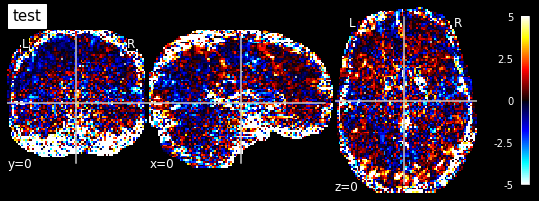

In [43]:
# overlay beta map with brain mask
plotting.plot_stat_map(nib.Nifti1Image(beta_trial01, img.affine), # this function needs a 3D data file
                       bg_img=nib.Nifti1Image(brainmask, brainmask_img.affine), # load the brain mask as a background picture
                       cut_coords=(0, 0, 0), #use to select coordinates that you want to view
                       title="test",
                       vmax=5)

['natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/brainmask.nii.gz']